

# Project: No-Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The following is a dataset extracted from a clinic database of more than 10 thausand records of appointments made and wether the patiens showed up for this appointment or not. 

We will go through few steps to explore our data and wrangle it. Then we will start asking some questions and answer it using analysis performed on the data. 

Can we predict wether this patient going to attend or not depending on his age? 

Does the duration between the schedule day and appointment day affect wether or not this patient will show or not?




In [1]:
#Importing needed libraries that I will be using in wrangling and visualization 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [8]:
#Loading the dataframe with a function
def load_data (path):
    '''  Function that takes the path of the file as an argument and return the dataframe    '''
    df = pd.read_csv(f'{path}.csv')     
    return(df) 
    
    
df = load_data('noshowappointments-kagglev2-may-2016')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#Checking the size of the data
df.shape

(110527, 14)

In [4]:
#Checking if there is nulls, and check the type fo data so that if any adjustment required i can perform them before wrangling the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#Check for duplicate
df.duplicated().sum()

0

In [10]:
#Check the number of duplicated appointments from the same patient in the same day
df.duplicated(['PatientId','ScheduledDay']).sum()

1334

Here we can see that there is 1334 patient who called more than once to make an appointment in the same day, we will drop these values in the cleaning phase


In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


No missing values or duplicates in the dataset

We need to change the type of the scheduled date and appointment date to be date instead of object, we will perform this step in the cleaning part

In the Age column, the minimum is (-1) which is not an acceptable value for age so we would need to sort this out in the cleaning part as well

We would need also to change the name of the no show column to be "No_show", so we wouldn't have a problem checking on the column or make any changes on it.

In [12]:
#Check the number of Males and Females
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [13]:
#creating a variable for the number if MAles and Females
Gender_type= df.Gender.nunique()
Females = df['Gender'].value_counts()[0]
Males = df['Gender'].value_counts()[1]
print(Females)
print(Males)

71840
38687


In [14]:
#Checking number of neighbourhood, if it was small i could have check if it is relavent ,, but it is high number of neighbourhoods

df.Neighbourhood.nunique()

81


### Data Cleaning 
> In the following steps we will start trimming the data as we mentioned before, we are dropping the age with negative value, adjusting the name of the 'no_show' column, adjust the type of scheduled and appointment day and removing the data that we will not use in the analysis. 


In [15]:
#Removing any negative value in the Age column
df.drop(df[df['Age']<0].index,inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
#Adjusting the name of 'No Show' Column
df.rename(columns={'No-show':'No_show'},inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#Removing records where the same patient call in the same day more than once to book an appointment
df.drop_duplicates(['PatientId','ScheduledDay'],inplace=True)
df.shape

(109192, 14)

In [18]:
#For No show column, No means he has showed up and Yes means he did not show up ,, so i would change the encoding to showed_up and no_show to avoid any confusion

df['No_show'].replace(to_replace="No", value="Showed_up", inplace = True)
df['No_show'].replace(to_replace="Yes", value="No_show", inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed_up
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed_up
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Showed_up
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed_up
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed_up


In [19]:
#Number of shows and no shows
df.No_show.value_counts()

Showed_up    87331
No_show      21861
Name: No_show, dtype: int64

In [20]:
#Removing columns I wont use in my analysis
df.drop([ 'AppointmentID', 'Neighbourhood','Hipertension','Alcoholism','Handcap'], axis = 1, inplace = True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Diabetes,SMS_received,No_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,0,Showed_up
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,Showed_up
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,Showed_up
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,Showed_up
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,0,Showed_up


Here we have removed the columns that we wont use in the analysis

In [21]:
#adjusting the type of schedule day and appointment day from object to date and time to be able to make date and time functions on them
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109192 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       109192 non-null  float64            
 1   Gender          109192 non-null  object             
 2   ScheduledDay    109192 non-null  datetime64[ns, UTC]
 3   AppointmentDay  109192 non-null  datetime64[ns, UTC]
 4   Age             109192 non-null  int64              
 5   Scholarship     109192 non-null  int64              
 6   Diabetes        109192 non-null  int64              
 7   SMS_received    109192 non-null  int64              
 8   No_show         109192 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Does the age affect wether the patient will show up or not?)

[Text(0.5, 1.0, 'Relationship Between Age and No_show')]

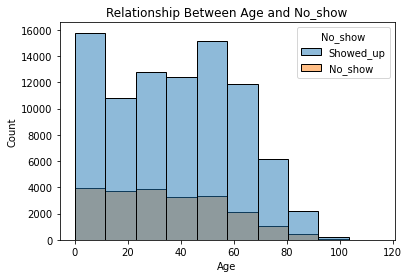

In [18]:
#visualizing the relationship between attendance and age 
sns.histplot(data=df,x='Age',hue='No_show', bins = 10).set(title='Relationship Between Age and No_show')



It looks like the highest show up percentage is in the small ages , parents are taking care of thier kids, and the second highest is betweeb 45 and 58 which is almost middle aged perople are most likely to show up for thier appointment.

As the age of the parient increase it is more likely for him to not show up for his appointment.

[Text(0.5, 1.0, 'Relationship Between Diabetes & Age')]

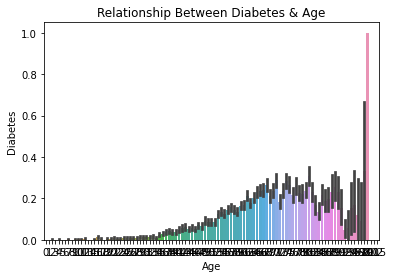

In [19]:
#Checking the relationship between the age and the diabetes
sns.barplot(data = df, x = 'Age', y = 'Diabetes' ).set(title='Relationship Between Diabetes & Age')


Seems that the older the person is, the most likely he is to have diabetes as a cronic deases. 

Age is not the cause of diabetes,but we can say that it is more common in the elderly. 

### Research Question 2  (Does the duration between the schedule day and appointment day affect wether the patient will show up or not?)

In [20]:
#Creating a new column that represents the duration between the appointment day and schedule day
df['AppointmentDay']=df['AppointmentDay'].dt.date
df['ScheduledDay']=df['ScheduledDay'].dt.date
df['Duration_gap']=df['AppointmentDay']-df['ScheduledDay']
df['Duration_gap']=df['Duration_gap'].dt.days
df['Duration_gap']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: Duration_gap, Length: 109192, dtype: int64

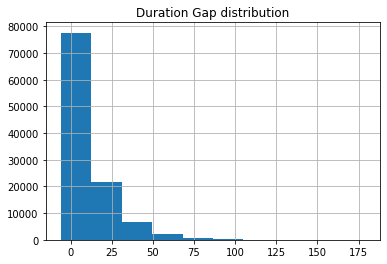

In [22]:
df['Duration_gap'].hist().set(title='Duration Gap distribution');

Seems that most of the patients have booked with smaller gap between schedule day and appointment day, lets explore this data in term of which have showed up and which haven't

[Text(0.5, 1.0, 'Relationship Between Duration Gap and No_show')]

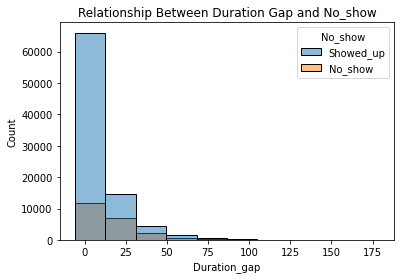

In [23]:
#Visualizing the No shows breakdown with the duration gap theme
sns.histplot(data=df,x='Duration_gap',hue='No_show', bins = 10).set(title='Relationship Between Duration Gap and No_show')



In the above histplot we can see that there is an obvious relationship between the duration gap between the scheduled day and the appointment date and the show up pervcentage. 

The smaller this duration is, the more likely that the patient to show up. 


<a id='conclusions'></a>
## Conclusions

> In conclusion, the summary of the analysis done presented that most of the No show were relatively elder people, but that can be because most of the booked appointment are elder poeple, so we can not concider this as a factor that determine wether the patient would attend or not. 

>Looking in the other factor, we can say that most of the same day booking arrive at the appointments, we can say that we predict wether the patient will attend or not depending on the gap between the schedule day and appointment day. So, same day booking are most likely to attend in comparison to later days. 

>We have built some insight depending on the available data, but we can not say that this is suficient to create a prediction on wethear the patient would attend or not as there is other factors not stated in the data. For example what is the patien suffering from. 